In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing as p
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

#utwórz zmienną EPOCHS i przypisz do niej wartość 10000 lub więcej
EPOCHS = 10000
#wczytaj dane heart
df= pd.read_csv('./datasets/heart.csv')
#standaryzuj dane
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df_scaled = p.StandardScaler().fit_transform(X)
#podziel je na dane treningowe i testowe
X_train, X_val, y_train, y_val = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
#ustawienie monitora wczesnego zatrzymania, monitorujemy wartość loss na zbiorze walidacyjnym
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [3]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]
model_es = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])
model_es.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_es = model_es.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val), callbacks = [es])
hist_es = pd.DataFrame(history_es.history)

Epoch 1/10000
8/8 [==============================] - 1s 52ms/step - loss: 2.2222 - accuracy: 0.6612 - val_loss: 2.7842 - val_accuracy: 0.6885
Epoch 2/10000
8/8 [==============================] - 0s 9ms/step - loss: 1.6759 - accuracy: 0.7190 - val_loss: 2.1011 - val_accuracy: 0.7377
Epoch 3/10000
8/8 [==============================] - 0s 9ms/step - loss: 1.4784 - accuracy: 0.7562 - val_loss: 2.0452 - val_accuracy: 0.7541
Epoch 4/10000
8/8 [==============================] - 0s 9ms/step - loss: 1.3847 - accuracy: 0.7562 - val_loss: 2.0158 - val_accuracy: 0.7541
Epoch 5/10000
8/8 [==============================] - 0s 9ms/step - loss: 1.3068 - accuracy: 0.7810 - val_loss: 1.9905 - val_accuracy: 0.7377
Epoch 6/10000
8/8 [==============================] - 0s 10ms/step - loss: 1.2891 - accuracy: 0.7975 - val_loss: 1.9760 - val_accuracy: 0.7705
Epoch 7/10000
8/8 [==============================] - 0s 9ms/step - loss: 1.2738 - accuracy: 0.8017 - val_loss: 1.9668 - val_accuracy: 0.8033
Epoch 8/100

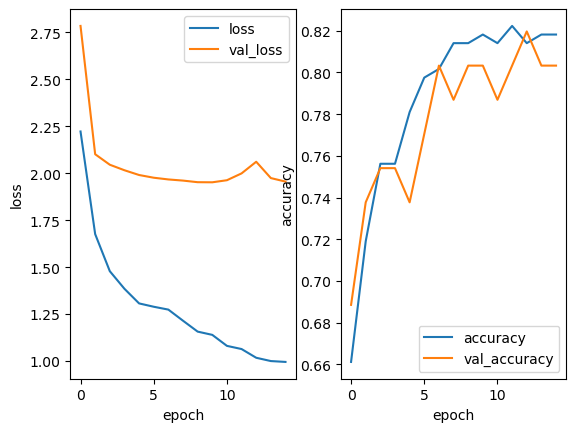

<Figure size 640x480 with 0 Axes>

In [4]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist_es.loss, label = "loss")
plt.plot(hist_es.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_es.accuracy, label = "accuracy")
plt.plot(hist_es.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [5]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]
model_es2 = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])
model_es2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_es2 = model_es2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val), callbacks = [es])
hist_es2 = pd.DataFrame(history_es2.history)

Epoch 1/10000
8/8 [==============================] - 1s 48ms/step - loss: 6.6494 - accuracy: 0.4256 - val_loss: 5.2510 - val_accuracy: 0.4426
Epoch 2/10000
8/8 [==============================] - 0s 12ms/step - loss: 5.4531 - accuracy: 0.4298 - val_loss: 4.3621 - val_accuracy: 0.4918
Epoch 3/10000
8/8 [==============================] - 0s 10ms/step - loss: 3.7932 - accuracy: 0.4380 - val_loss: 3.2776 - val_accuracy: 0.4918
Epoch 4/10000
8/8 [==============================] - 0s 10ms/step - loss: 2.3167 - accuracy: 0.4298 - val_loss: 2.5021 - val_accuracy: 0.4590
Epoch 5/10000
8/8 [==============================] - 0s 11ms/step - loss: 1.5302 - accuracy: 0.4959 - val_loss: 1.9689 - val_accuracy: 0.5738
Epoch 6/10000
8/8 [==============================] - 0s 11ms/step - loss: 1.1713 - accuracy: 0.5702 - val_loss: 1.4737 - val_accuracy: 0.6066
Epoch 7/10000
8/8 [==============================] - 0s 11ms/step - loss: 0.9956 - accuracy: 0.6116 - val_loss: 1.4097 - val_accuracy: 0.5902
Epoch 

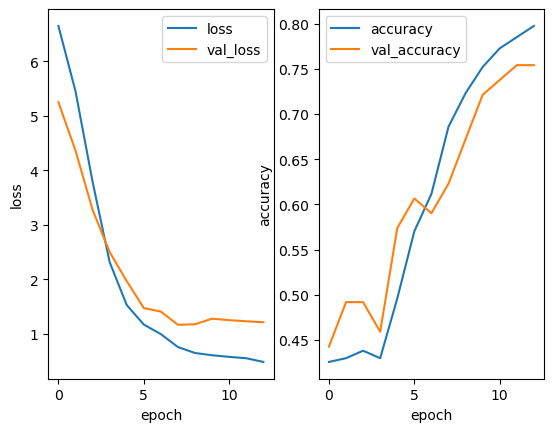

<Figure size 640x480 with 0 Axes>

In [6]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist_es2.loss, label = "loss")
plt.plot(hist_es2.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_es2.accuracy, label = "accuracy")
plt.plot(hist_es2.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

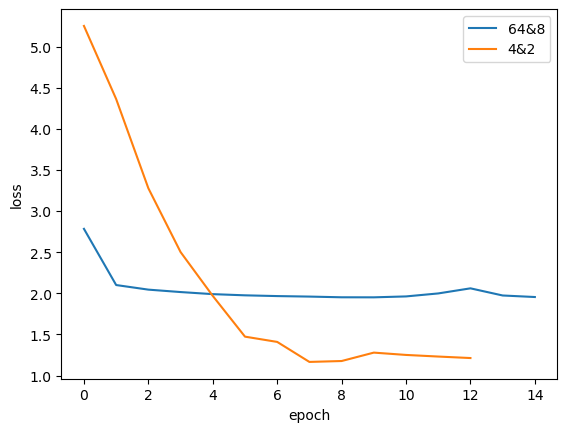

In [7]:
plt.plot(hist_es.val_loss, label = "64&8")
plt.plot(hist_es2.val_loss, label = "4&2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

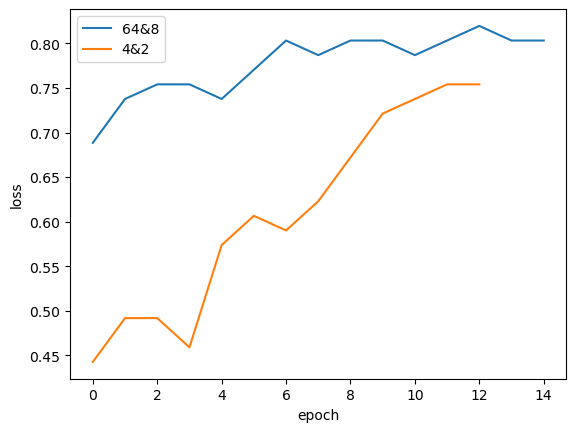

In [8]:
plt.plot(hist_es.val_accuracy, label = "64&8")
plt.plot(hist_es2.val_accuracy, label = "4&2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()